In [1]:
import time
from qiskit import IBMQ
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import execute
from qiskit import Aer
from qiskit.tools.jupyter import *
from qiskit.providers.jobstatus import JobStatus, JOB_FINAL_STATES
# import basic plot tools
from qiskit.tools.visualization import plot_histogram, circuit_drawer

In [2]:
IBMQ.load_accounts()
IBMQ.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx4') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmqx2') from IBMQ(ibm-q, open, main)>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(ibm-q, open, main)>]

In [3]:
backend = IBMQ.backends(name='ibmqx2')[0]
print("The backend is " + backend.name())
simulator = Aer.get_backend('qasm_simulator')

The backend is ibmqx2


In [4]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])
qc.h(q[4])
qc.measure(q, c)

In [5]:
start_time = time.time()

# IBMQx2

In [6]:
job_exp = execute(qc, backend=backend, initial_layout=[0, 1, 2, 3, 4], shots=8192)

start_time = time.time()
job_status = job_exp.status()
while job_status not in JOB_FINAL_STATES:
    print(f'Status @ {time.time()-start_time:0.0f} s: {job_status.name},'
          f' est. queue position: {job_exp.queue_position()}')
    time.sleep(10)
job_status = job_exp.status()

In [7]:
counts = job_exp.result().get_counts(qc)
print(counts)

{'11001': 268, '01101': 202, '01111': 252, '00100': 260, '10101': 225, '11110': 255, '11111': 220, '00010': 257, '11010': 307, '10110': 236, '00101': 250, '10001': 235, '11101': 206, '11100': 271, '10100': 276, '01110': 287, '01000': 296, '10111': 218, '00011': 260, '10010': 295, '00001': 212, '01011': 242, '11000': 287, '11011': 246, '00110': 276, '01001': 269, '00111': 222, '01100': 260, '01010': 276, '00000': 288, '10011': 241, '10000': 297}


In [26]:
qb = {}
qb1 = sum((v for k, v in counts.items() if k.endswith('0')), 0)
qb2 = sum((v for k, v in counts.items() if k.endswith('1')), 0)
qb3 = sum((v for k, v in counts.items() if k.endswith(('00' , '01'))), 0)
qb4 = sum((v for k, v in counts.items() if k.endswith(('10' , '11'))), 0)
qb5 = sum((v for k, v in counts.items() if k.endswith(('000' , '001' , '010' , '011'))), 0)
qb6 = sum((v for k, v in counts.items() if k.endswith(('100' , '101' , '110' , '111'))), 0)
qb7 = sum((v for k, v in counts.items() if k.startswith(('00' , '10'))), 0)
qb8 = sum((v for k, v in counts.items() if k.startswith(('01' , '11'))), 0)
qb9 = sum((v for k, v in counts.items() if k.startswith('0')), 0)
qb10 = sum((v for k, v in counts.items() if k.startswith('1')), 0)

qb.update([('qb00', qb1),
           ('qb01', qb2),
           ('qb10', qb3),
           ('qb11', qb4),
           ('qb20', qb5), 
           ('qb21', qb6),
           ('qb30', qb7), 
           ('qb31', qb8),
           ('qb40', qb9), 
           ('qb41', qb10)])

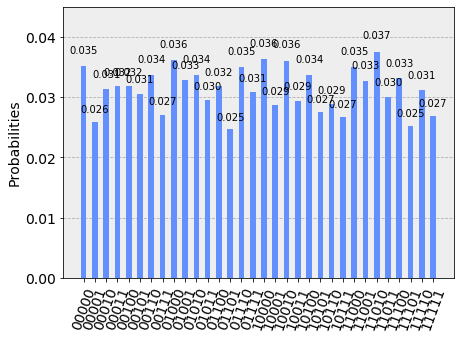

In [8]:
plot_histogram(counts) #raw data

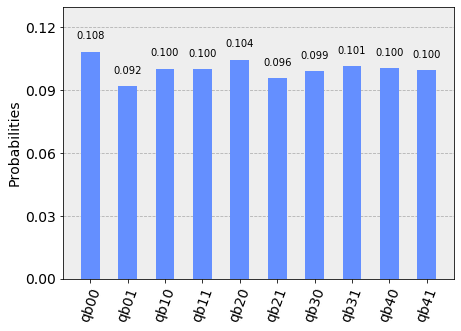

In [27]:
plot_histogram(qb)

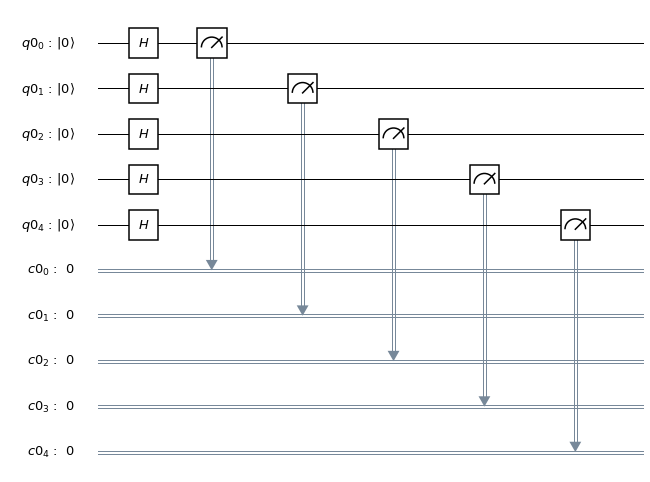

In [9]:
qc.draw(output='mpl')

# Simulation

In [21]:
job_sim = execute(qc, backend=simulator, shots=8192)
counts_sim = job_sim.result().get_counts(qc)

In [22]:
print("\nTotal count for simulator:",counts_sim)


Total count for simulator: {'11010': 259, '11001': 239, '01101': 252, '00100': 260, '10101': 245, '11110': 242, '01111': 251, '10110': 242, '00010': 254, '01010': 300, '11111': 264, '00101': 261, '10001': 216, '10100': 234, '01000': 233, '10111': 267, '01110': 266, '00011': 247, '10010': 285, '11101': 291, '11011': 251, '00001': 278, '11100': 241, '11000': 265, '01011': 258, '00110': 246, '01100': 255, '01001': 249, '00111': 259, '00000': 255, '10011': 258, '10000': 269}


In [28]:
qbs = {}
qbs1 = sum((v for k, v in counts_sim.items() if k.endswith('0')), 0)
qbs2 = sum((v for k, v in counts_sim.items() if k.endswith('1')), 0)
qbs3 = sum((v for k, v in counts_sim.items() if k.endswith(('00' , '01'))), 0)
qbs4 = sum((v for k, v in counts_sim.items() if k.endswith(('10' , '11'))), 0)
qbs5 = sum((v for k, v in counts_sim.items() if k.endswith(('000' , '001' , '010' , '011'))), 0)
qbs6 = sum((v for k, v in counts_sim.items() if k.endswith(('100' , '101' , '110' , '111'))), 0)
qbs7 = sum((v for k, v in counts_sim.items() if k.startswith(('00' , '10'))), 0)
qbs8 = sum((v for k, v in counts_sim.items() if k.startswith(('01' , '11'))), 0)
qbs9 = sum((v for k, v in counts_sim.items() if k.startswith('0')), 0)
qbs10 = sum((v for k, v in counts_sim.items() if k.startswith('1')), 0)

qbs.update([('qb00', qbs1),
           ('qb01', qbs2),
           ('qb10', qbs3),
           ('qb11', qbs4),
           ('qb20', qbs5), 
           ('qb21', qbs6),
           ('qb30', qbs7), 
           ('qb31', qbs8),
           ('qb40', qbs9), 
           ('qb41', qbs10)])

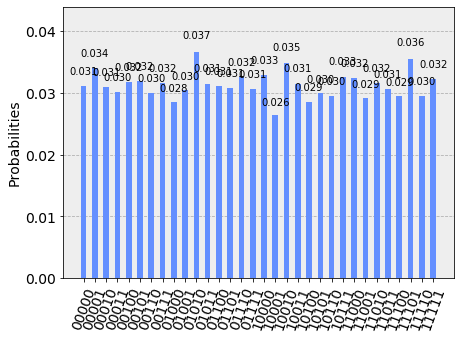

In [24]:
plot_histogram(counts_sim)

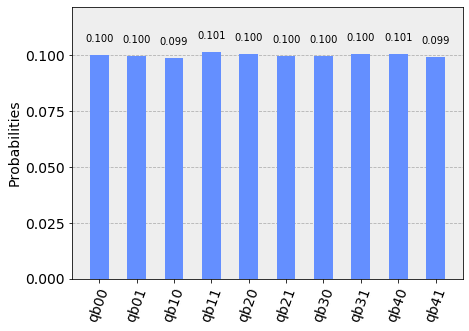

In [29]:
plot_histogram(qbs)

In [13]:
print("--- %s seconds ---" % round(time.time() - start_time), 2)

--- 70 seconds --- 2
